In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from glob import glob

**En el siguiente código se persigue contabilizar el número de genes H2H a través de las filas que contiene el archivo de los genes H2H de cada organismo. La idea es visulizar de forma gráfica estos datos**

In [3]:
# Obtener la lista de archivos gff
files_gff = glob("*_vecinos.csv")

# Lista para almacenar el número de filas de cada archivo
num_rows = []

# Iterar sobre cada archivo gff
for file in files_gff:
    try:
        # Leer el archivo gff
        df_gff = pd.read_csv(file, sep=",")        
        # Contar el número de filas y añadirlo a la lista
        num_rows.append(len(df_gff))
        
    except pd.errors.ParserError:
        # Manejar el error (por ejemplo, imprimir un mensaje, omitir el archivo)
        print(f"Error al analizar el archivo: {file}")

# Crear un DataFrame con los nombres de los archivos y el número de filas
df_num_rows = pd.DataFrame({"Archivo": [os.path.basename(file).split('_')[0] for file in files_gff], "Num_filas": num_rows})
df_num_rows

,Archivo,Num_filas
0,Cunech1,1393
1,Hesve2finisherSC,2450
2,Liccor1,1450
3,Mucci3,2089
4,Mucend1,1538
5,Mucfus1,860
6,Mucrac1,1418
7,Rhipu1,2079
8,Phybl2,1837
9,Aspnid1,2034


**En el siguiente código se crea el gráfico ordenando los datos de los genes H2H y utilizando un gradiente de color para poder visualizar dichos datos. Aquí se representa el número de genes H2H totales**

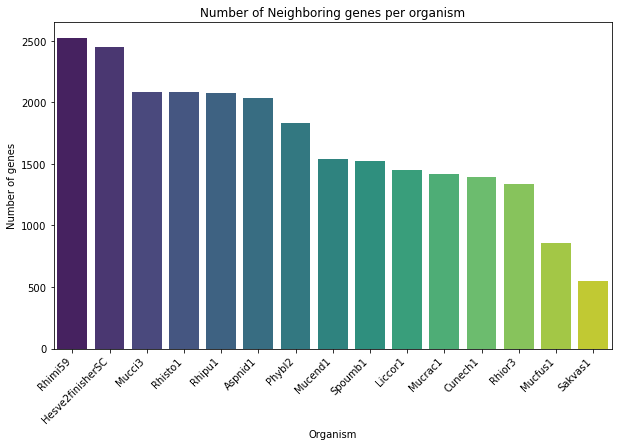

In [4]:
# Ordenar el DataFrame por número de filas
df_num_rows = df_num_rows.sort_values(by="Num_filas", ascending=False)

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Archivo", y="Num_filas", data=df_num_rows, palette="viridis")

# Añadir título y etiquetas a los ejes
plt.title('Number of Neighboring genes per organism')
plt.xlabel('Organism')
plt.ylabel('Number of genes')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Guardar la imagen como SVG
plt.savefig('number_vec.svg', format='svg')
# Mostrar el gráfico
plt.show()

**La versión de este código persigue obtener el número de parejas de genes H2H, y no el total de genes H2H. Por ello, se divide entre 2 el número de filas de cada archivo que contiene los genes H2H.**

In [5]:
# Obtener la lista de archivos gff
files_gff = glob("*_vecinos.csv")

# Lista para almacenar el número de filas de cada archivo
num_rows = []

# Iterar sobre cada archivo gff
for file in files_gff:
    try:
        # Leer el archivo gff
        df_gff = pd.read_csv(file, sep=",")        
        # Contar el número de filas y añadirlo a la lista
        num_rows.append(len(df_gff)/2)
        
    except pd.errors.ParserError:
        # Manejar el error (por ejemplo, imprimir un mensaje, omitir el archivo)
        print(f"Error al analizar el archivo: {file}")

# Crear un DataFrame con los nombres de los archivos y el número de filas
df_num_rows = pd.DataFrame({"Archivo": [os.path.basename(file).split('_')[0] for file in files_gff], "Num_filas": num_rows})
df_num_rows

,Archivo,Num_filas
0,Cunech1,696.5
1,Hesve2finisherSC,1225.0
2,Liccor1,725.0
3,Mucci3,1044.5
4,Mucend1,769.0
5,Mucfus1,430.0
6,Mucrac1,709.0
7,Rhipu1,1039.5
8,Phybl2,918.5
9,Aspnid1,1017.0


**En el siguiente código se crea el gráfico ordenando los datos de las PAREJAS de genes H2H y utilizando un gradiente de color para poder visualizar dichos datos**

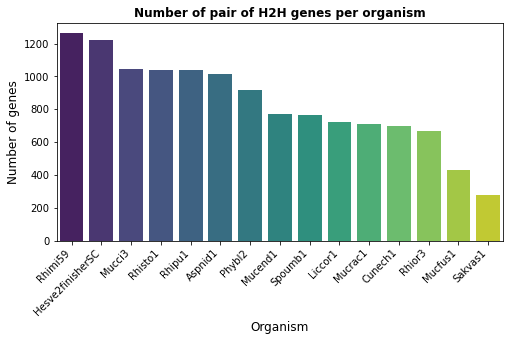

In [9]:
# Ordenar el DataFrame por número de filas
df_num_rows = df_num_rows.sort_values(by="Num_filas", ascending=False)

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x="Archivo", y="Num_filas", data=df_num_rows, palette="viridis")

# Añadir título y etiquetas a los ejes
plt.title('Number of pair of H2H genes per organism',fontsize=12, weight='bold')
plt.xlabel('Organism',fontsize=12)
plt.ylabel('Number of genes',fontsize=12)

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Guardar la imagen como SVG
plt.savefig('number_vec_par.svg', format='svg', bbox_inches='tight')
# Mostrar el gráfico
plt.show()